# Exploration of the MNHN mammals dataset

In [2]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

- https://science.mnhn.fr/all/search
- https://www.gbif.org/dataset/3959ee49-7678-4a88-9049-5dfc55ccebf3

# Reading data

In [2]:
!ls ../data/gbif_mammals

citations.txt
dataset
meta.xml
metadata.xml
multimedia.txt
occurrence.txt
rights.txt
verbatim.txt


In [9]:
data = pd.read_csv("../data/gbif_mammals/occurrence.txt",sep = "\t")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (168,216,241,242,243,244,245,246,247,248) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
data.head()

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,...,recordedByID,identifiedByID,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
0,2863210302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2863210301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2863209301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2863208301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2823508301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.shape

(95995, 249)

In [13]:
data.tail(50).to_excel("extract_mammals.xlsx")

In [6]:
data.iloc[0].dropna()

gbifID                                                           2863210302
identifier                http://coldb.mnhn.fr/catalognumber/mnhn/zm/ac-...
license                                                           CC_BY_4_0
modified                                               2011-03-02T15:17:35Z
institutionCode                                                        MNHN
collectionCode                                                           ZM
basisOfRecord                                            PRESERVED_SPECIMEN
occurrenceID              http://coldb.mnhn.fr/catalognumber/mnhn/zm/ac-...
catalogNumber                                                    AC-1998-14
recordedBy                                        Couté, Alain|Couté, Alain
occurrenceStatus                                                    PRESENT
eventDate                                               1997-10-01T00:00:00
year                                                                   1997
month       

# Data exploration

In [7]:
important_columns = [
    "countryCode",
    "locality",
    'kingdom',
    'phylum', 
    'class',
    'order',
    'family',
    'genus',
    "specificEpithet",
    "species",
    "genericName",
    "acceptedScientificName",
]

## Occurences

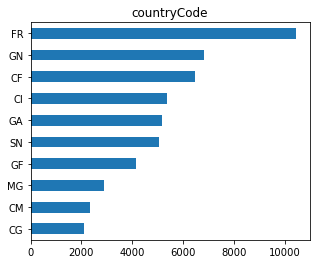

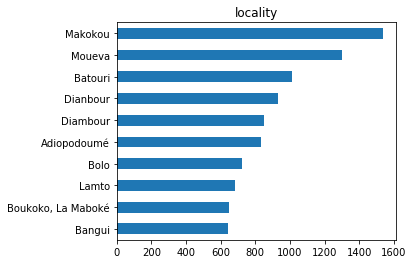

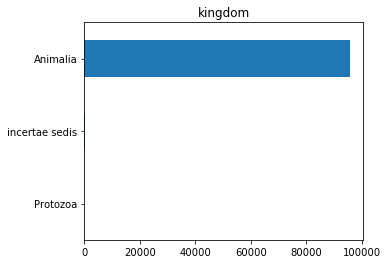

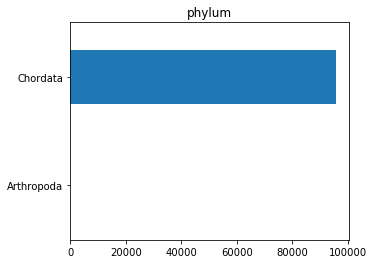

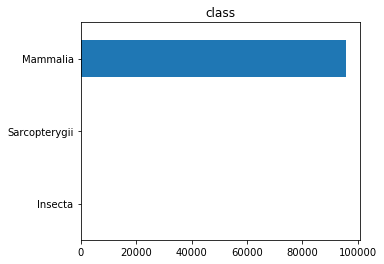

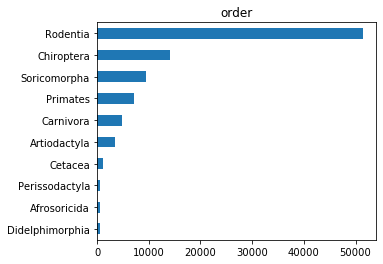

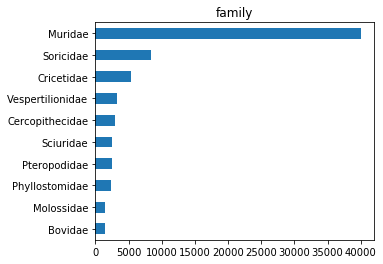

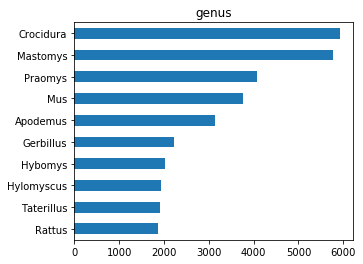

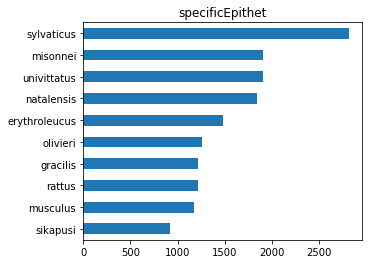

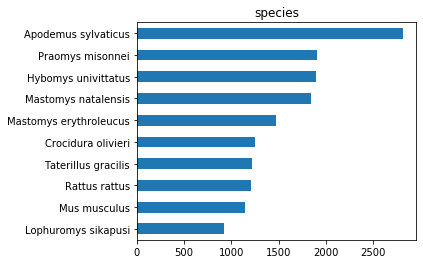

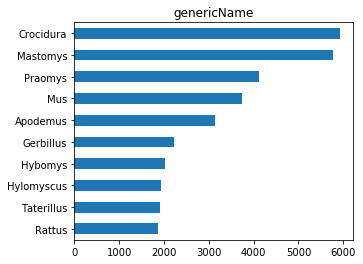

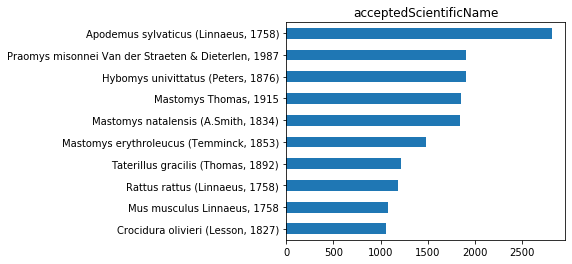

In [8]:
for col in important_columns:
    data[col].value_counts().head(10).sort_values().plot(kind = "barh",figsize = (5,4),title = col)
    plt.show()

## Phylogenetic tree as sunburst
https://plotly.com/python/sunburst-charts/

In [14]:
import plotly.express as px
tree_cols = ["order", 'family', 'genus',"species"]

In [15]:
# Uncomment here to see the graph
# Slow to keep it in RAM in the notebook

# fig = px.sunburst(data.dropna(subset = tree_cols), path=tree_cols,color = "family")
# fig.show()

## Phylogenetic tree as treemap

In [90]:
# Uncomment here to see the graph
# Slow to keep it in RAM in the notebook

fig = px.treemap(data.dropna(subset = tree_cols), path=tree_cols,color = "family",maxdepth = 2)
fig.show()

## Other options for visualizations
Using D3.js or similar js libraries, we have many more interactive options
- https://observablehq.com/@mbostock/tree-of-life
- https://observablehq.com/@d3/gallery
- https://observablehq.com/@d3/cluster-dendrogram

# Link with wikipedia

## Methodology proposition
- Browse through all possible pages, to find the biology pages
- Latin extraction term to get the species/class/order
    - Method 1 : language detection in latin with precoded lib (polyglot pycld2)
    - Method 2 : pretrained string classification algorithm
    - Method 3 : scrape from the HTML
- Approximate search in the tree (maybe using fast fuzzy matching)

## Exploration with wikipedia python library
https://github.com/goldsmith/Wikipedia

In [3]:
import sys
sys.path.append("../")

from pokedex.wiki import BiologyWikipediaBot

In [4]:
wiki = BiologyWikipediaBot()

[INFO] Wikipedia bot initialized in FR


In [5]:
page = wiki.search_biology_page("panda roux")

In [6]:
page

<WikipediaPage 'Ailurus fulgens'>

In [8]:
page.open()

In [95]:
page.open()

In [93]:
page.images

['https://upload.wikimedia.org/wikipedia/commons/8/83/Article_de_qualit%C3%A9.svg',
 'https://upload.wikimedia.org/wikipedia/commons/8/83/Article_de_qualit%C3%A9.svg',
 'https://upload.wikimedia.org/wikipedia/commons/2/2e/Bowhead_whale_size.svg',
 'https://upload.wikimedia.org/wikipedia/commons/c/c9/Bowheads42.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/b/be/Cetacea_range_map_Bowhead_Whale.png',
 'https://upload.wikimedia.org/wikipedia/commons/c/c7/Cites_I.svg',
 'https://upload.wikimedia.org/wikipedia/commons/1/17/Creative-Tail-Animal-dolphin.svg',
 'https://upload.wikimedia.org/wikipedia/commons/c/c2/Dolphin_2.png',
 'https://upload.wikimedia.org/wikipedia/commons/7/72/Faroe_stamp_198_Baleana_mysticetus.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/f/f1/Mouse.svg',
 'https://upload.wikimedia.org/wikipedia/commons/0/01/Status_iucn3.1_LC-fr.svg']

In [80]:
page.links

['1885',
 '52 hertz',
 'Abraham Storck',
 'Albinos',
 'Amérindiens',
 'Ancien français',
 'Arctique',
 'Aristote',
 "Autorité (sciences de l'information)",
 'Azote',
 'Açores',
 'BTS (groupe)',
 'Balaena mysticetus',
 'Balaenidae',
 'Balaenoptera acutorostrata',
 'Balaenoptera borealis',
 'Balaenoptera musculus',
 'Balaenoptera physalus',
 'Baleine (homonymie)',
 'Baleine blanche',
 'Baleine bleue',
 'Baleine boréale',
 'Baleine commune',
 "Baleine d'Arnoux",
 'Baleine de Biscaye',
 'Baleine de Blainville',
 'Baleine de Hubbs',
 'Baleine de Minke',
 'Baleine des Basques',
 'Baleine du Groenland',
 'Baleine franche',
 'Baleine franche australe',
 "Baleine franche de l'Atlantique Nord",
 "Baleine franche de l'Atlantique nord",
 'Baleine grise',
 'Baleine noire',
 'Baleine pic',
 'Baleine pilote',
 'Baleine pygmée',
 'Baleine sarde',
 'Baleine tueuse',
 'Baleine à bec',
 'Baleine à bosse',
 'Baleines vraies',
 'Baleines à bec',
 'Berardius',
 'Berardius arnuxii',
 'Bestiaire',
 'Bible',
 

In [89]:
data.query("order=='Mysticeti'")

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,...,recordedByID,identifiedByID,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
